In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import log

# Caminata clásica

En este código se mostrará la construcción de una caminata discreta, unidimensional, aleatoria, clásica y sesgada en profundidad. También se caracterizará la caminata en base a la evolución de la dispersión, calculada según la varianza de la distribución de probabilidad en el tiempo. Se tendrán las siguientes definiciones:

$t$: número de pasos de la caminata

$n$: posición respecto al nodo origen

$n_0$: nodo origen o posición inicial

$d$: cantidad de nodos del grafo unidimensional

$\alpha$: parámetro de sesgo. Si aumenta, es mayor la probabilidad de alejarse del nodo origen.

Cabe aclarar que, mientras el número de pasos t sea menor a (d+1)/2, se puede considerar que los resultados coinciden con los de un grafo unidimensional infinito.

## Revisión numérica

Se hará uso de la siguiente ecuación para calcular la distribución $\mathbf{p}^t$:

$$
\mathbf{p}^t = (1-2\alpha)\mathbf{p}^{t-2}+\alpha A\cdot\mathbf{p}^{t-1}
    \label{distr_clas}
$$

$$    
    p_n^t = (1-2\alpha)p_n^{t-2}+\alpha(p_{n-1}^{t-1}+p_{n+1}^{t-1})
    \label{prob_clas}
$$

In [2]:
d = 33

In [3]:
alpha = 0.5

In [4]:
n0 = 17

Creación de la matriz de adyascencia $A$ para el grafo unidimensional.

In [5]:
A = np.zeros((d, d), dtype=int)
    
for i in range(d):
    for j in range(d):
        if abs(i - j) == 1:
            A[i, j] = 1

In [6]:
A

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

Primera distribución $\mathbf{p}^0$

In [7]:
P0 = np.zeros(d, dtype=int)
P0[n0-1] = 1

In [8]:
P0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Esta función calcula la distribución $\mathbf{p}^t$ con $\alpha$, $t$, la matriz de adyascencia $A$ y la distribución inicial $\mathbf{p}^0$ cómo parámetros de entrada.

In [9]:
cache = {}

def difusion(alpha, t, A, P0):
    if t == 0:
        return P0
    if t == 1:
        P1 = 0.5 * np.dot(A, P0)
        return P1
    if t in cache:
        return cache[t]
    Ptmm = difusion(alpha, t - 2, A, P0)
    Ptm = difusion(alpha, t - 1, A, P0)
    Pt = (1 - 2 * alpha) * Ptmm + alpha * np.dot(A, Ptm)
    cache[t] = Pt
    return Pt

Dada una distribución $\mathbf{p}^t$ y la posición inicial $n_0$, esta función calcula la varianza, que es nuestro indicativo de dispersión.

In [10]:
def disp(Pt, n0):
    sum = 0
    for i, p in enumerate(Pt):
        sum += ((i+1-n0)**2)*p
    return sum
    

A continuación se calcularán entonces las distribuciones de los $t$ pares, y la dispersión para cada distribución:

In [11]:
Pt = []
St = []
for t in range(0, int((d-1)/2)+1, 1):
    Pt.append(difusion (alpha, t, A, P0))
    St.append(disp(Pt[-1], n0))

In [12]:
for i in Pt:
    print (i)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.25 0.   0.5  0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.  ]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.125 0.    0.375 0.    0.375 0.    0.125 0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.0625 0.     0.25   0.     0.375  0.     0.25   0.
 0.0625 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.    ]
[0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.03125 0.      0.15625 0.      0.3125  0.      0.3125
 0.      0.15625 0.      0.03125 0.      0.      0.      0.      0.
 0. 

In [13]:
print(St)

[0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0]


En este caso, para mayor claridad, se graficarán sólamente los elementos pares, debido a que los impares son nulos.

In [14]:
def graf_distr(Pt, alpha):
    indices = np.arange(len(Pt[0]))
    indices_pares = indices[::2]

    Pt_pares = []
    for i in Pt:
        Pt_pares.append(i[::2])
    Pt_pares = Pt_pares[::2]


    colores = plt.cm.viridis(np.linspace(0, 1, len(Pt_pares)))
   
    for i, (P, color) in enumerate(zip(Pt_pares, colores)):
        plt.plot(indices_pares, P, label=f't = {2*i}', color=color)

    plt.xlabel('$n$')
    plt.ylabel('$P_n^t$')
    plt.title(f' (alpha = {alpha})')

    plt.legend()

    plt.show()

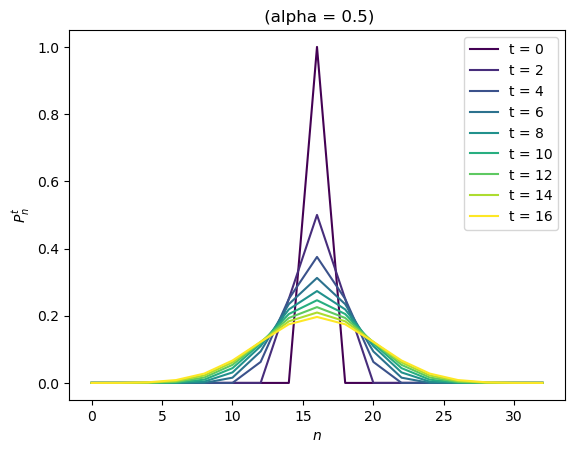

In [15]:
graf_distr(Pt, alpha)


Veremos el comportamiento de esta caminata para diferentes valores de $\alpha$.

In [16]:
alphavec = np.concatenate((np.arange(0, 0.1, 0.01),np.arange(0.1, 1.1, 0.1)))
print(alphavec)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.2  0.3  0.4
 0.5  0.6  0.7  0.8  0.9  1.  ]


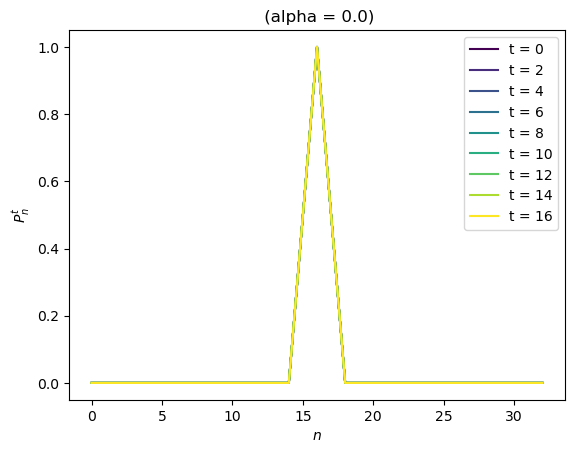

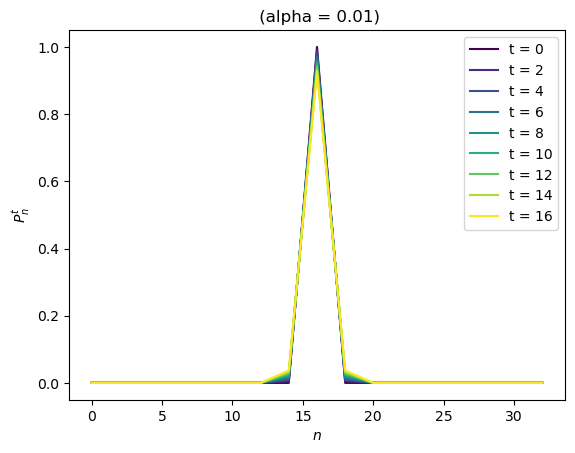

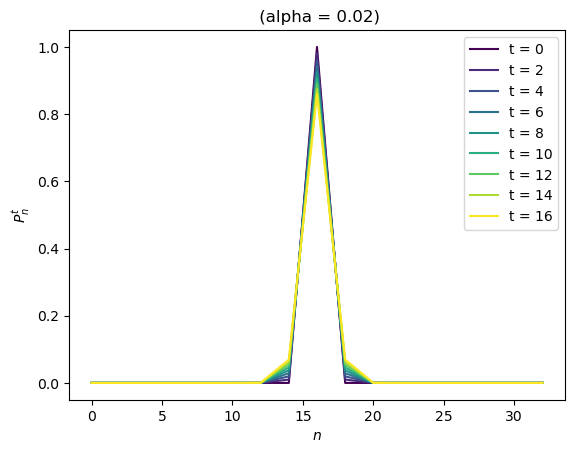

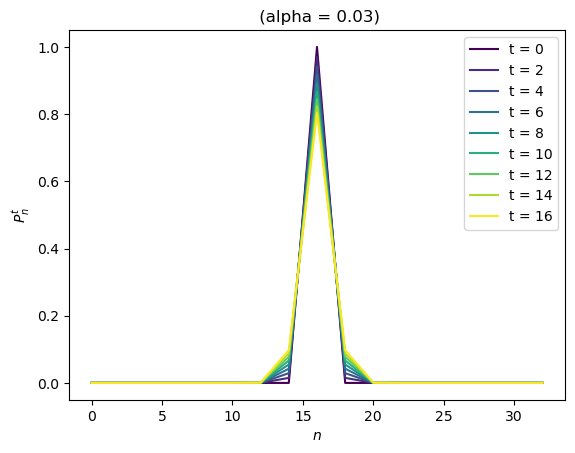

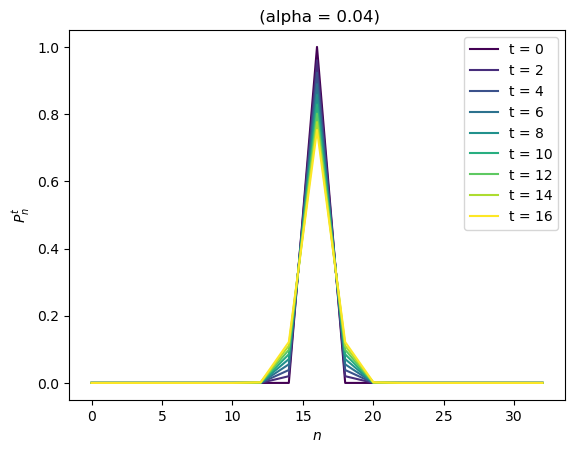

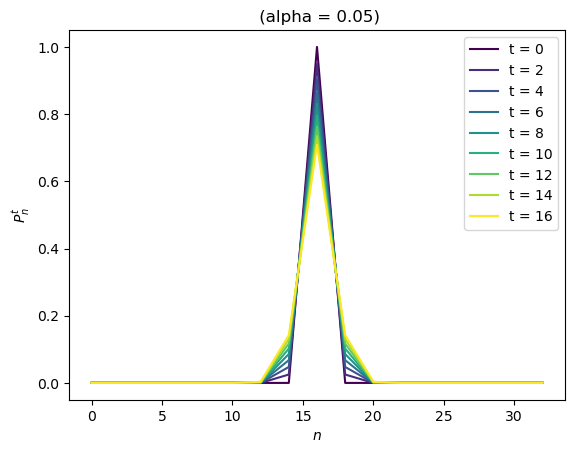

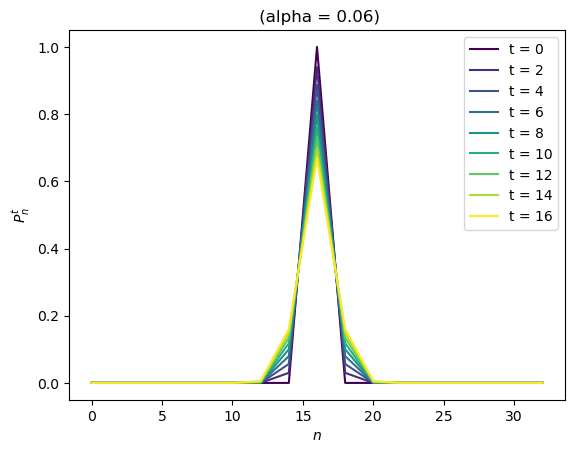

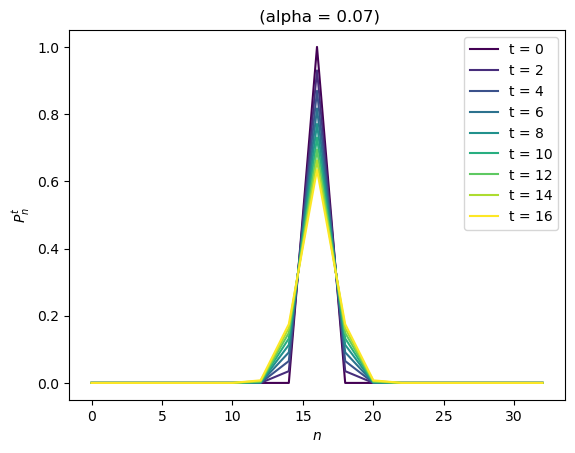

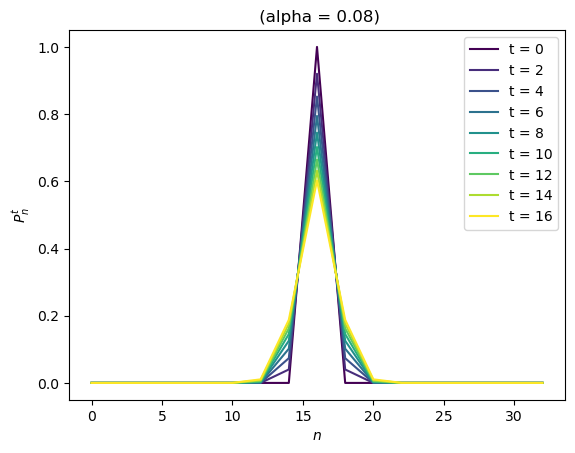

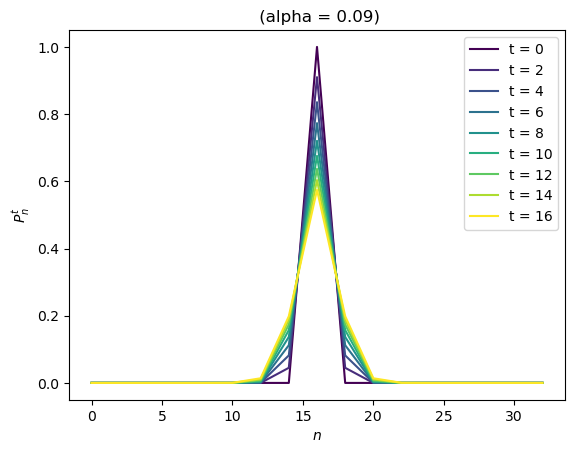

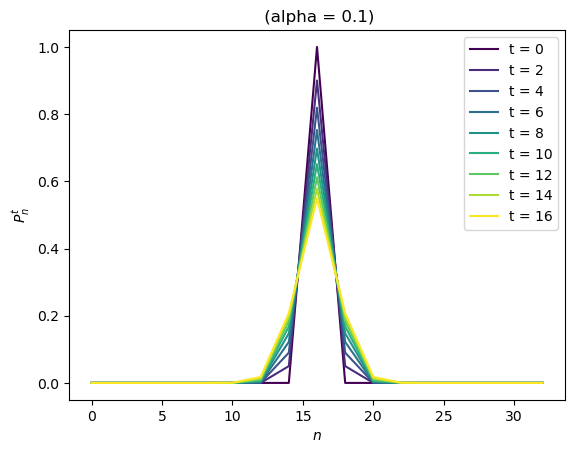

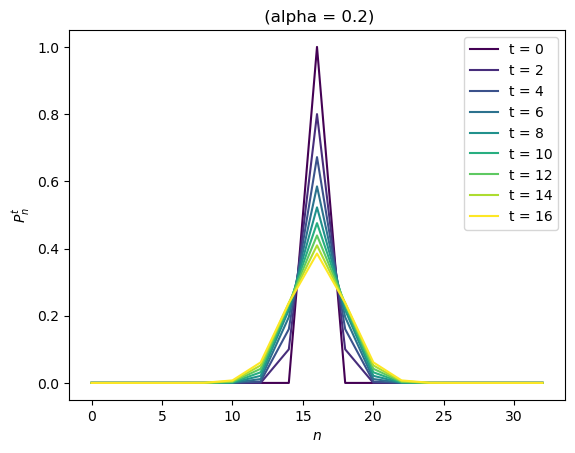

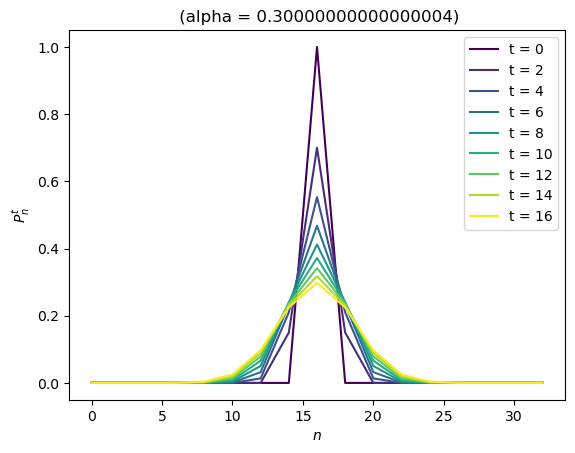

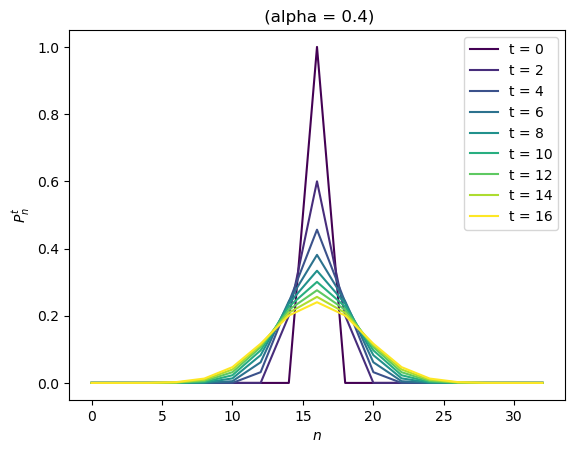

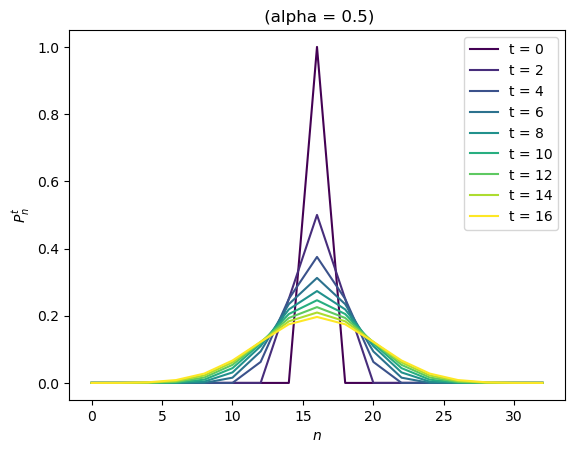

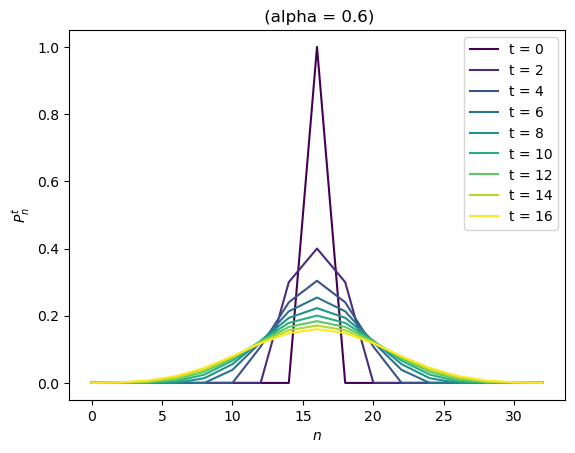

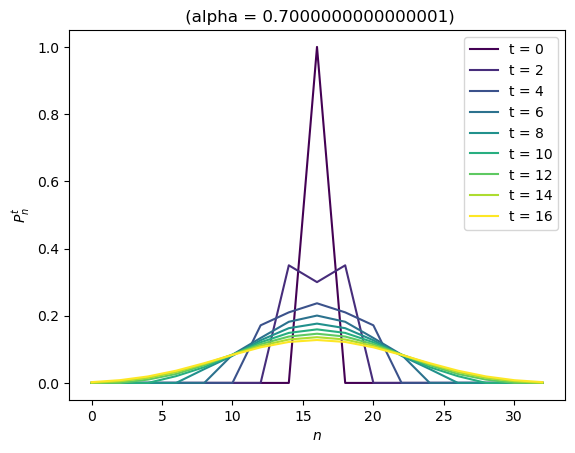

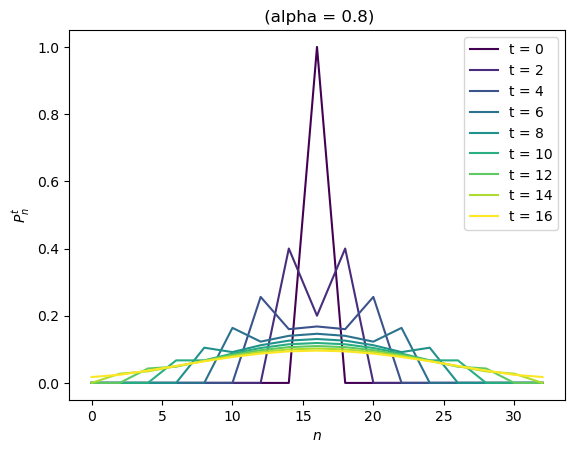

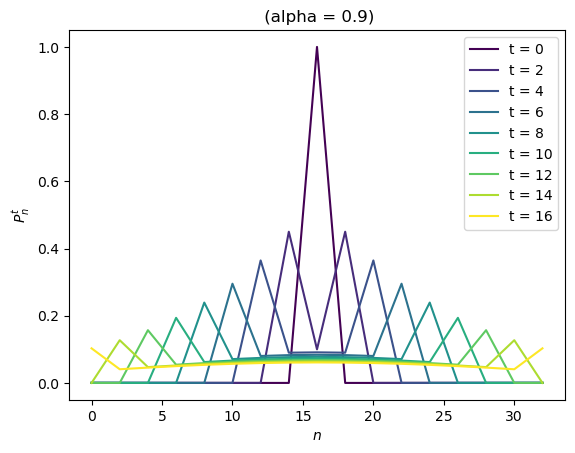

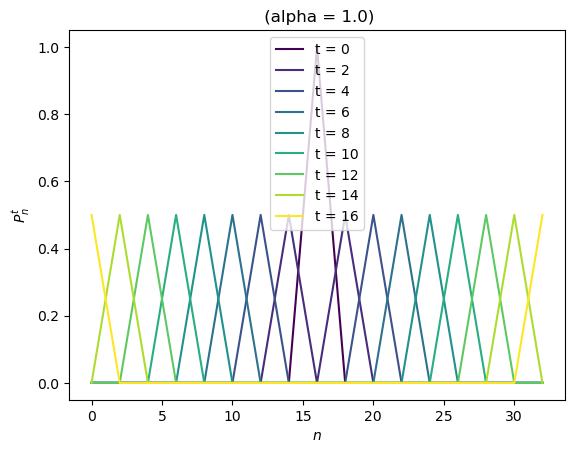

In [17]:
Ptvec = []
Stvec = []

for alp in alphavec:
    cache = {}
    Pt2 = []
    St2 = []
    for t in range(0, int((d-1)/2)+1, 1):
        Pt2.append(difusion (alp, t, A, P0))
        St2.append(disp(Pt2[-1], n0))
    graf_distr(Pt2, alp)
    Ptvec.append(Pt2)
    Stvec.append(St2)

In [18]:
def graf_var(Stvec, alphavec):
    
    Stvec_pares = []
    for i in Stvec:
        Stvec_pares.append(i[::2])
    
    colores = plt.cm.viridis(np.linspace(0, 1, len(Stvec_pares[0])-4))

    for i, color in zip(range(len(Stvec_pares[0])-4), colores):
        columna = [fila[i] for fila in Stvec_pares]
        plt.plot(alphavec, columna, label=f't = {2*i}', color=color)

    plt.xlabel("$alpha$")
    plt.ylabel('$\sigma^2$')
    # plt.title(f'Gráfico de $\alpha$ vs. $$ ')

    plt.legend()

    plt.show()

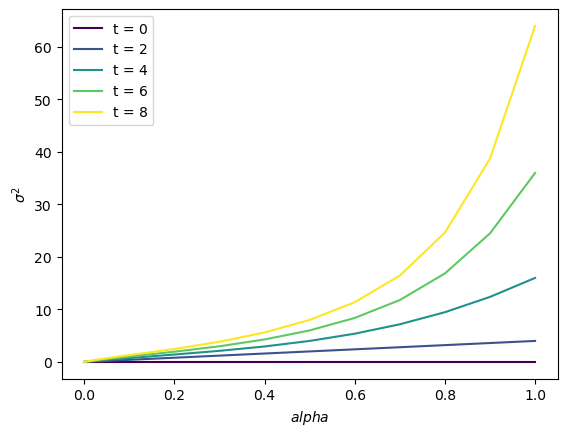

In [19]:
graf_var(Stvec, alphavec)

In [20]:
def graf_var2(Stvec, alphavec):
    
    Stvec_pares = []
    for i in Stvec:
        Stvec_pares.append(i[2::2])
            
    Stvec_pares_log = np.log(Stvec_pares[1:])
    t_log = np.log(range(2,len(Stvec_pares_log[0])*2+2,2))
        
    colores = plt.cm.viridis(np.linspace(0, 1, len(Stvec_pares)-1))
        
    for i, (St_log, color) in enumerate(zip(Stvec_pares_log, colores)):
        plt.plot(t_log, St_log, label=f'alpha = {alphavec[i+1]}', color=color)

    plt.xlabel("$log(t)$")
    plt.ylabel('$log(\sigma^2)$')
    # plt.title(f'Gráfico de $\alpha$ vs. $$ ')

    plt.legend()

    plt.show()
    return t_log, Stvec_pares_log

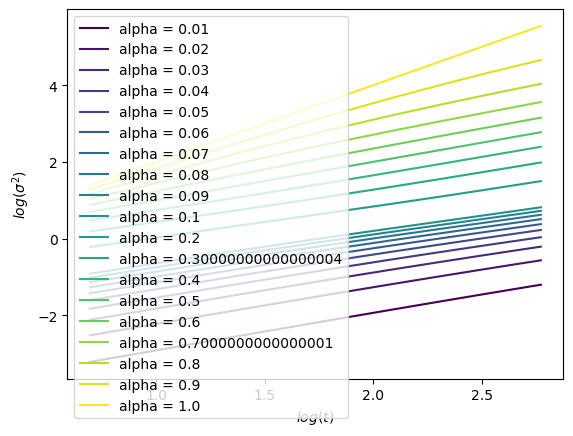

In [21]:
x, y = graf_var2(Stvec, alphavec)

In [22]:
pends = []
for Stvec_log in y:
    x_array = np.array(x)
    y_array = np.array(Stvec_log)

    # Calcula la pendiente utilizando el método de mínimos cuadrados
    pends.append(np.sum((x_array - np.mean(x_array)) * (y_array - np.mean(y_array))) / np.sum((x_array - np.mean(x_array))**2))

print (pends)

[0.9686042221688246, 0.9410490593491133, 0.9171058006988182, 0.8965141059260923, 0.8789952614183466, 0.8642640941755559, 0.8520388710010095, 0.8420489056148996, 0.8340399102736495, 0.8277773358868975, 0.8242937279508448, 0.8675806576816116, 0.9274303570029637, 1.0, 1.0898377742071848, 1.2074629490141529, 1.3724480472178129, 1.6201809138721008, 2.0]


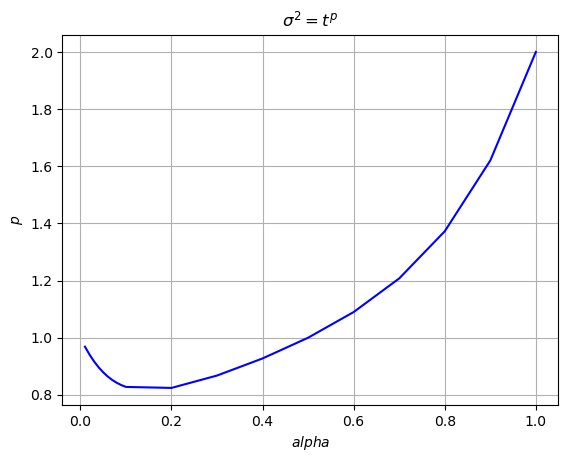

In [23]:
plt.plot(alphavec[1:], pends, color='b')
plt.title(f'$\sigma^2 = t^p$')
plt.xlabel("$alpha$")
plt.ylabel('$p$')
plt.grid(True)
plt.show()

## Revisión analítica

Primero, se construirá la función analítica dada por:

$$
p_n^t = \left\lbrace
\begin{array}{ll}
\displaystyle p_{n=0}^t & n=0\\
\displaystyle p_{0<|n|<t}^t & 0<|n|<t\\
\displaystyle p_{|n|=t}^t & |n|=t\\
\displaystyle 0 & |n|>t
\end{array}
\right.
$$

Donde:

$$
p_{n = 0}^t = \sum_{x=1}^{\frac{t}{2}-1} 2\binom{\frac{t}{2}-1}{x} \binom{\frac{t}{2}-1}{x-1}  b_{2x} + \sum_{x=1}^{\frac{t}{2}} 2\binom{\frac{t}{2}-1}{x-1}^2 b_{2x+1}
$$

$$
p_{0<|n|<t}^t = \sum_{x=1}^{\frac{t-|n|}{2}-1} \left(\binom{\frac{t+n}{2}-1}{x} \binom{\frac{t-n}{2}-1}{x-1} + \binom{\frac{t+n}{2}-1}{x-1} \binom{\frac{t-n}{2}-1}{x}\right) b_{2x} \nonumber
+ \sum_{x=1}^{\frac{t-|n|}{2}} 2\binom{\frac{t+n}{2}-1}{x-1}\binom{\frac{t-n}{2}-1}{x-1} b_{2x+1} \nonumber 
+ \binom{\frac{t+|n|}{2}-1}{\frac{t-|n|}{2}} b_{t-|n|}
$$

$$
    p_{|n| = t}^t = \frac{1}{2} \alpha^{t-1}
$$

$$
b_c \equiv \frac{1}{2} \alpha^{t-c-1} (1-\alpha)^c
$$

In [24]:
def bc (alpha, t, c):
    return 0.5 *(alpha**(t-c-1))*((1-alpha)**c) 

def distr_a (t, alpha, d, n0):
    Pt = np.zeros(d, dtype=float)
    for i, ptn in enumerate(Pt):
        n = i-n0+1
        if (t-n) % 2 != 0:
            Pt[i] = 0
        elif n == 0:
            result = 0

            for x in range(1, t // 2):
                result += 2 * math.comb(t // 2 - 1, x) * math.comb(t // 2 - 1, x - 1) * bc (alpha,t,2*x)

            for x in range(1, (t // 2) + 1):
                result += 2 * math.comb(t // 2 - 1, x - 1) ** 2 * bc (alpha,t,2*x+1)

            Pt[i] = result
                    
        elif abs(n) < t and abs(n) > 0:
            result = 0

            for x in range(1, (t-abs(n)) // 2):
                result += (math.comb((t+n) // 2 - 1, x) * math.comb((t-n) // 2 - 1, x - 1) +math.comb((t+n) // 2 - 1, x-1) * math.comb((t-n) // 2 - 1, x)) * bc (alpha,t,2*x)

            for x in range(1, ((t-abs(n)) // 2) + 1):
                result += 2 * math.comb( (t+n)// 2 - 1, x - 1) * math.comb( (t-n)// 2 - 1, x - 1) * bc (alpha,t,2*x+1)
            
            result += math.comb( (t+abs(n))// 2 - 1, (t-abs(n))// 2) * bc (alpha,t,t-abs(n))

            Pt[i] = result
        elif abs(n)==t:
            Pt[i] = bc (alpha,t,0)
        else:
            pass
        
    return Pt
    
    
    

In [25]:
i = distr_a(8, alpha, d, n0)

In [26]:
i

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00390625, 0.        ,
       0.03125   , 0.        , 0.109375  , 0.        , 0.21875   ,
       0.        , 0.2734375 , 0.        , 0.21875   , 0.        ,
       0.109375  , 0.        , 0.03125   , 0.        , 0.00390625,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [27]:
Pt[8]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00390625, 0.        ,
       0.03125   , 0.        , 0.109375  , 0.        , 0.21875   ,
       0.        , 0.2734375 , 0.        , 0.21875   , 0.        ,
       0.109375  , 0.        , 0.03125   , 0.        , 0.00390625,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

# Caminata cuántica